<a href="https://colab.research.google.com/github/Arthpatel01/AI_and_ML/blob/main/Stock_Price_Prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

In [3]:
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434311,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144302,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405670,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510971,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679504,86709100


In [6]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.802709,156.907809,152.691315,154.835060,153.933644,8.791038e+07
std,13.063034,12.937389,13.108058,13.056081,12.808261,2.365699e+07
min,127.989998,129.949997,125.870003,126.040001,125.674019,3.519590e+07
25%,144.330002,146.709999,142.324997,144.645004,144.040268,7.229740e+07
50%,154.009995,155.830002,151.940002,154.089996,153.175354,8.373720e+07
75%,166.189995,167.989998,164.044998,165.915001,164.791656,9.693705e+07
max,182.630005,182.940002,179.119995,182.009995,180.434311,1.826020e+08


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

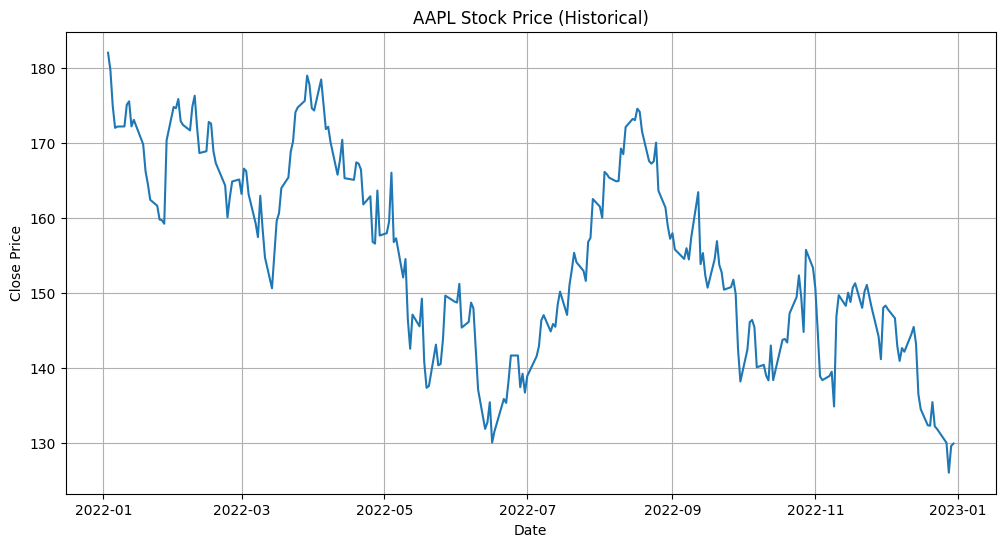

In [10]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(f"{stock_symbol} Stock Price (Historical)")
plt.grid(True)
plt.show()

In [11]:
feature_columns = ["Open", "High", "Low", "Volume"]

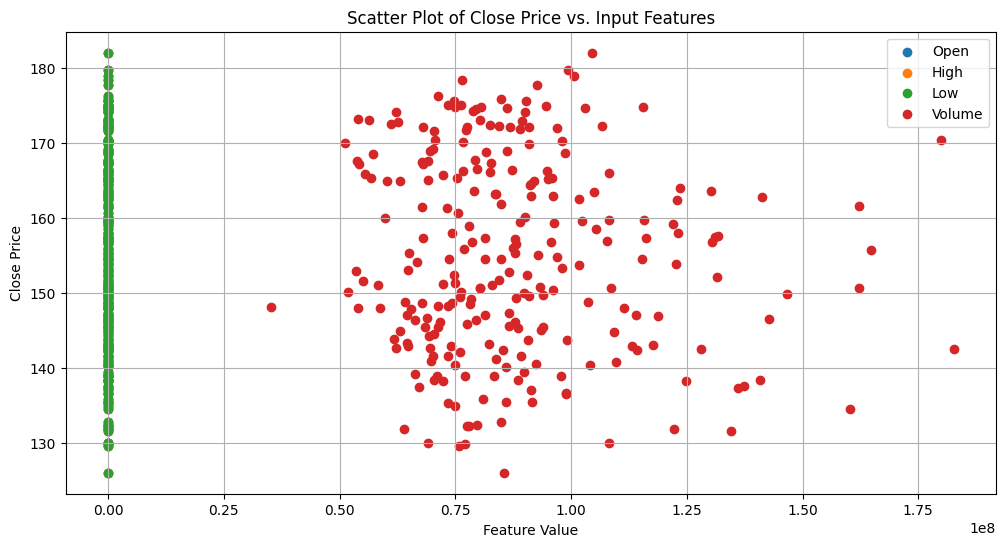

In [13]:
plt.figure(figsize=(12, 6))
for feature in feature_columns:
    plt.scatter(stock_data[feature], stock_data["Close"], label=feature)
plt.xlabel("Feature Value")
plt.ylabel("Close Price")
plt.title("Scatter Plot of Close Price vs. Input Features")
plt.legend()
plt.grid(True)
plt.show()

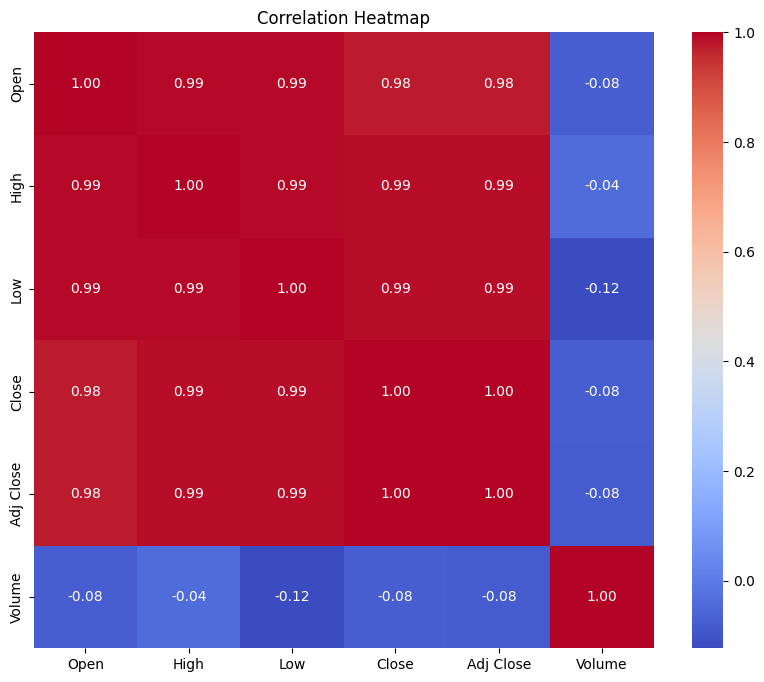

In [14]:
correlation_matrix = stock_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

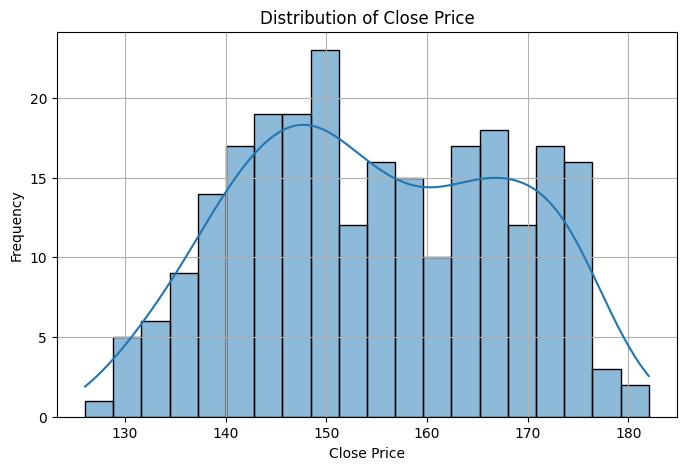

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(stock_data["Close"], bins=20, kde=True)
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title("Distribution of Close Price")
plt.grid(True)
plt.show()


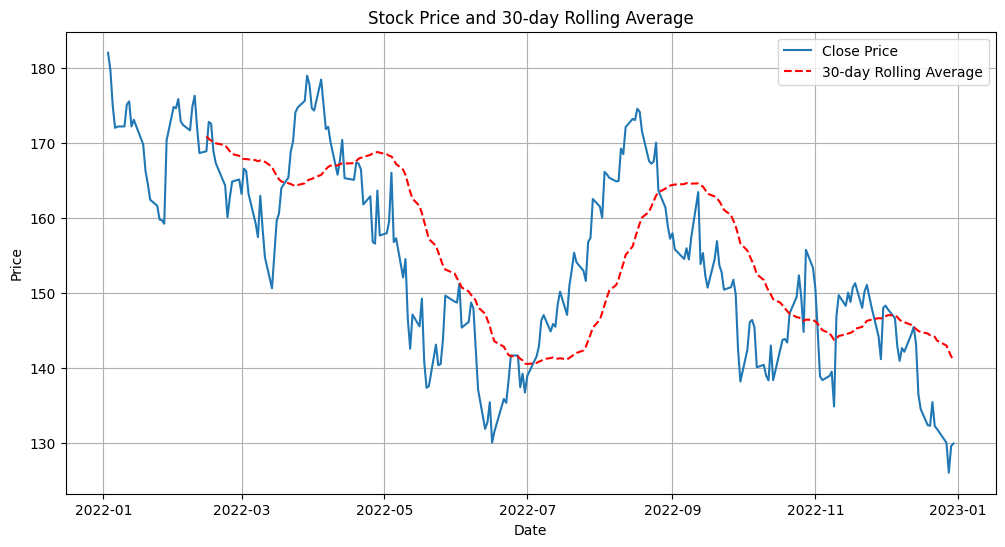

In [16]:
plt.figure(figsize=(12, 6))
rolling_average = stock_data["Close"].rolling(window=30).mean()
plt.plot(stock_data.index, stock_data["Close"], label="Close Price")
plt.plot(stock_data.index, rolling_average, label="30-day Rolling Average", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price and 30-day Rolling Average")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
target_column = "Close"

In [18]:
X = stock_data[feature_columns]
y = stock_data[target_column]
train_size = int(0.8 * len(stock_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [20]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

200
51
200
51


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1.1392409162959254
R2 Score: 0.9782904825013148


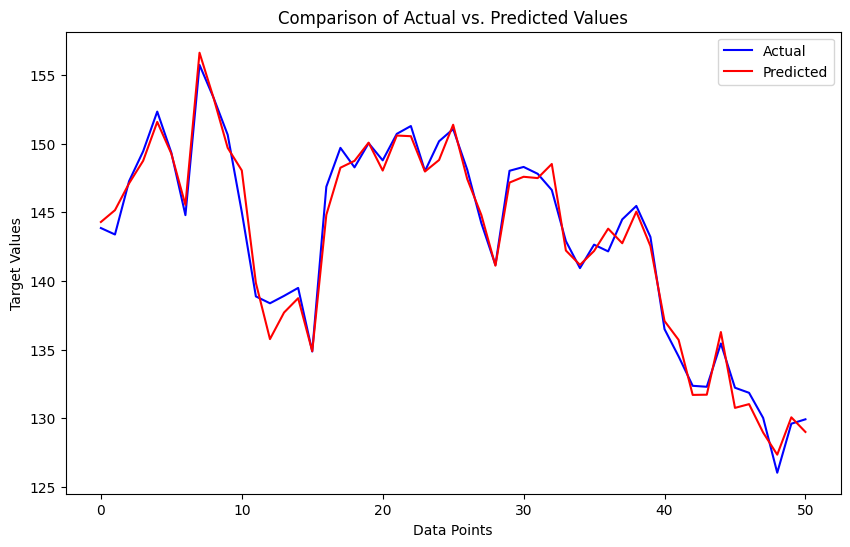

In [30]:
import numpy as np

data_points = np.arange(len(y_test))

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.title("Comparison of Actual vs. Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("Target Values")

# Plot the actual target values (y_test) in blue using a line plot
plt.plot(data_points, y_test, label="Actual", color='blue')

# Plot the predicted values (y_pred) in red using a line plot
plt.plot(data_points, y_pred, label="Predicted", color='red')

# Add a legend to differentiate between actual and predicted values
plt.legend()

# Show the plot
plt.show()

In [31]:
stock_symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2023-4-28"

new_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [32]:
new_x_test = stock_data[feature_columns]
new_y_test = stock_data[target_column]

In [33]:
new_y_pred = model.predict(new_x_test)

In [34]:
new_mse = mean_squared_error(new_y_test, new_y_pred)
new_r2 = r2_score(new_y_test, new_y_pred)

print("New Mean Squared Error:", new_mse)
print("New R2 Score:", new_r2)

New Mean Squared Error: 1.2079462326805308
New R2 Score: 0.9928853155545325


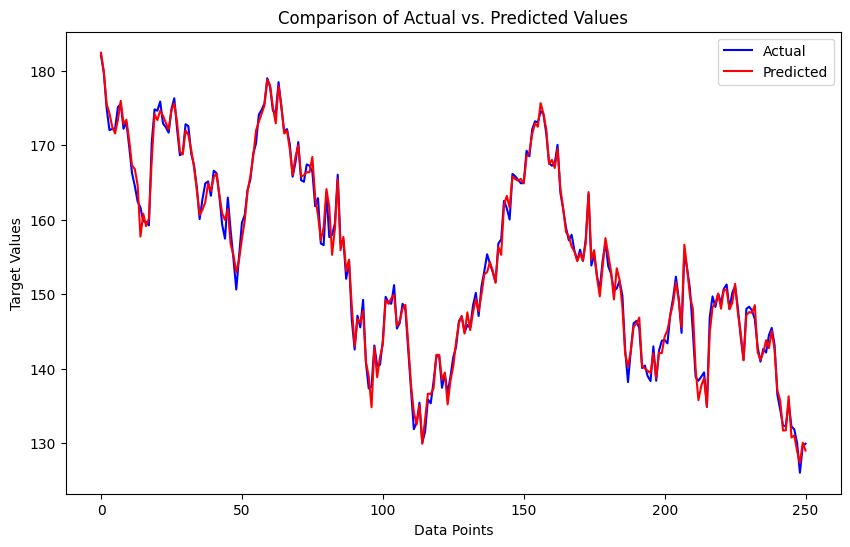

In [35]:
data_points = np.arange(len(new_y_test))

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.title("Comparison of Actual vs. Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("Target Values")

# Plot the actual target values (y_test) in blue using a line plot
plt.plot(data_points, new_y_test, label="Actual", color='blue')

# Plot the predicted values (y_pred) in red using a line plot
plt.plot(data_points, new_y_pred, label="Predicted", color='red')

# Add a legend to differentiate between actual and predicted values
plt.legend()

# Show the plot
plt.show()